Mean Squared Error: 1033.60
R² Score: -0.17


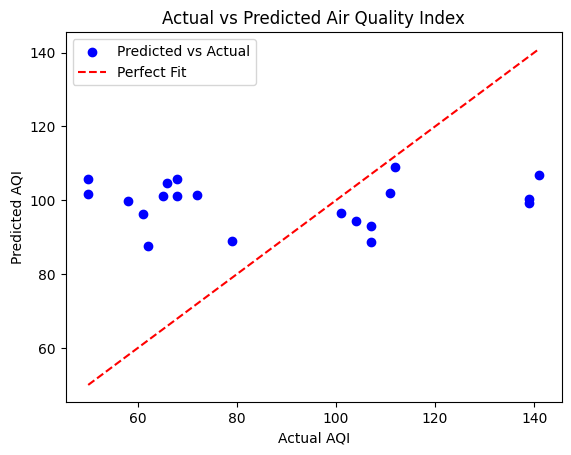

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate some mock environmental data
np.random.seed(42)
data = {
    'temperature': np.random.randint(15, 35, 100),  # Temperature in °C
    'humidity': np.random.randint(30, 80, 100),     # Humidity in %
    'wind_speed': np.random.uniform(0, 10, 100),    # Wind speed in m/s
    'air_quality_index': np.random.randint(50, 150, 100) # AQI value
}

# Create a DataFrame
df = pd.DataFrame(data)

# Split data sequentially (80% for training, 20% for testing)
train_size = int(len(df) * 0.8)
X_train = df[['temperature', 'humidity', 'wind_speed']].iloc[:train_size]
y_train = df['air_quality_index'].iloc[:train_size]
X_test = df[['temperature', 'humidity', 'wind_speed']].iloc[train_size:]
y_test = df['air_quality_index'].iloc[train_size:]

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted Air Quality Index')
plt.legend()
plt.show()
